<a href="https://colab.research.google.com/github/Letch49/ML-vvsu-2025-2026/blob/master/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from operator import index
from pyexpat import features
!pip install pandas seaborn scikit-learn

# Домашнее задание по практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2) 
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('student_performance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


In [4]:
# преобразовать категориальные признаки в category
df['grade'] = df.grade.astype('category')

In [5]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

y = df.weekly_self_study_hours
X = df.drop(['weekly_self_study_hours', 'student_id'], axis=1)
X

,attendance_percentage,class_participation,total_score,grade
0,95.6,3.8,97.9,A
1,80.0,2.5,83.9,B
2,86.3,5.3,100.0,A
3,70.2,7.0,100.0,A
4,81.9,6.9,92.0,A
...,...,...,...,...
999995,95.5,4.8,100.0,A
999996,82.7,6.7,88.3,A
999997,85.1,5.8,87.9,A
999998,90.0,5.3,100.0,A


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

In [6]:
X.head(n=3)

,attendance_percentage,class_participation,total_score,grade
0,95.6,3.8,97.9,A
1,80.0,2.5,83.9,B
2,86.3,5.3,100.0,A


In [7]:
y.head(n=3)

0    18.5
1    14.0
2    19.5
Name: weekly_self_study_hours, dtype: float64

In [8]:
categorial_features = ['grade'] # перечислить названия колонок с категориальными фичами
numeric_features = ['attendance_percentage', 'class_participation', 'total_score'] # перечислить названия колонок с категориальными фичами??порядковыми
best_features = categorial_features + numeric_features

## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.P.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

## Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [9]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["grade"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

In [10]:
encoded_columns = encoder.get_feature_names_out(['grade'])
encoded_columns

array(['grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_F'],
      dtype=object)

In [11]:
X_encoded = pd.DataFrame(encoded, columns=encoded_columns, index=X.index)

In [12]:
X = X.drop('grade', axis=1) if 'grade' in X.columns else X # убираем базовую колонку grade
X = pd.concat([X, X_encoded], axis=1)

In [13]:
X

,attendance_percentage,class_participation,total_score,grade_A,grade_B,grade_C,grade_D,grade_F
0,95.6,3.8,97.9,1.0,0.0,0.0,0.0,0.0
1,80.0,2.5,83.9,0.0,1.0,0.0,0.0,0.0
2,86.3,5.3,100.0,1.0,0.0,0.0,0.0,0.0
3,70.2,7.0,100.0,1.0,0.0,0.0,0.0,0.0
4,81.9,6.9,92.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
999995,95.5,4.8,100.0,1.0,0.0,0.0,0.0,0.0
999996,82.7,6.7,88.3,1.0,0.0,0.0,0.0,0.0
999997,85.1,5.8,87.9,1.0,0.0,0.0,0.0,0.0
999998,90.0,5.3,100.0,1.0,0.0,0.0,0.0,0.0


### Преобразование числовых

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['attendance_percentage', 'class_participation', 'total_score']
X_scaled = pd.DataFrame(scaler.fit_transform(X[num_cols]), columns=num_cols, index=X.index) # попробовать избавиться от категориальных. То ест не засовывать такие признаки в стандартизацию
X_scaled

,attendance_percentage,class_participation,total_score
0,1.155432,-1.116940,0.882278
1,-0.499891,-1.781419,-0.024872
2,0.168605,-0.350233,1.018350
3,-1.539774,0.518701,1.018350
4,-0.298281,0.467588,0.499979
...,...,...,...
999995,1.144821,-0.605802,1.018350
999996,-0.213393,0.365360,0.260232
999997,0.041272,-0.094664,0.234314
999998,0.561214,-0.350233,1.018350


In [15]:
X_normal = pd.concat([X_scaled, X_encoded], axis=1)
X_normal.head(n=3)

,attendance_percentage,class_participation,total_score,grade_A,grade_B,grade_C,grade_D,grade_F
0,1.155432,-1.116940,0.882278,1.0,0.0,0.0,0.0,0.0
1,-0.499891,-1.781419,-0.024872,0.0,1.0,0.0,0.0,0.0
2,0.168605,-0.350233,1.018350,1.0,0.0,0.0,0.0,0.0


### Модель
- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

In [16]:
from sklearn.linear_model import LinearRegression

# model.coef_ - коэфициенты фич (каждый коэф относится по индексу к своей фиче)

model1 = LinearRegression() # модель задачи 1
model1.fit(X_normal, y)
y_pred = model1.predict(X_normal)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def all_metrics(y_true, y_pred):
    # MAE - средняя абсолютная ошибка, вычисляется по формуле (|y_n-y_p_n|)/n, выдаёт количество баллов, чем меньше, тем лучше
    mae = mean_absolute_error(y_true, y_pred)
    
    # MSE - средняя квадратичная ошибка, это как в MAE, но каждое число в числителе возводится в квадрат. В целом более жёсткая оценка, нежели MAE
    mse = mean_squared_error(y_true, y_pred)

    # R^2 - коэффициент детерминации, оценка того, насколько модель просто лучше среднего, чем значение ближе к 1, тем лучше
    r2 = r2_score(y_true, y_pred)

    # RMSE - Root Mean Squared Error, корень от MSE, более чувствителен к выбросам, чем ближе к 0, тем лучше
    rmse = np.sqrt(mse)

    # MAPE - Mean Absolute Percentage Error, похоже на MAE, но только в процентах и формула другая, чувствителен к 0
    mape = np.mean(np.abs(y_true - y_pred) / y_true)*100

    return [
        f'MAE: {mae}',
        f'MSE: {mse}',
        f'RMSE: {rmse}',
        f'MAPE: {mape}',
        f'R^2: {r2}']
    

In [18]:
for i in all_metrics(y, y_pred): print(i)

MAE: 3.104176794830827
MSE: 15.591258161133792
RMSE: 3.9485767260031546
MAPE: inf
R^2: 0.6724670152236689


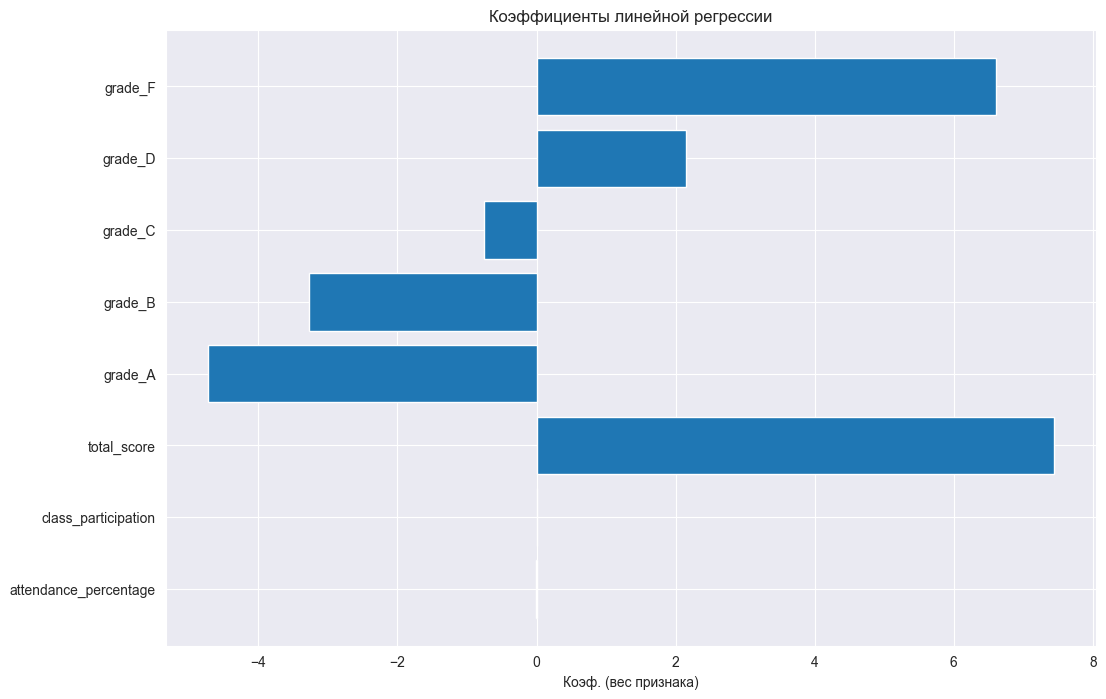

In [26]:
import matplotlib.pyplot as plt

feature_names = X_normal.columns
coefs = model1.coef_

plt.figure(figsize=(12, 8))
plt.barh(feature_names, coefs)
plt.xlabel('Коэф. (вес признака)')
plt.title('Коэффициенты линейной регрессии')
plt.show()

C:\python\WEB\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


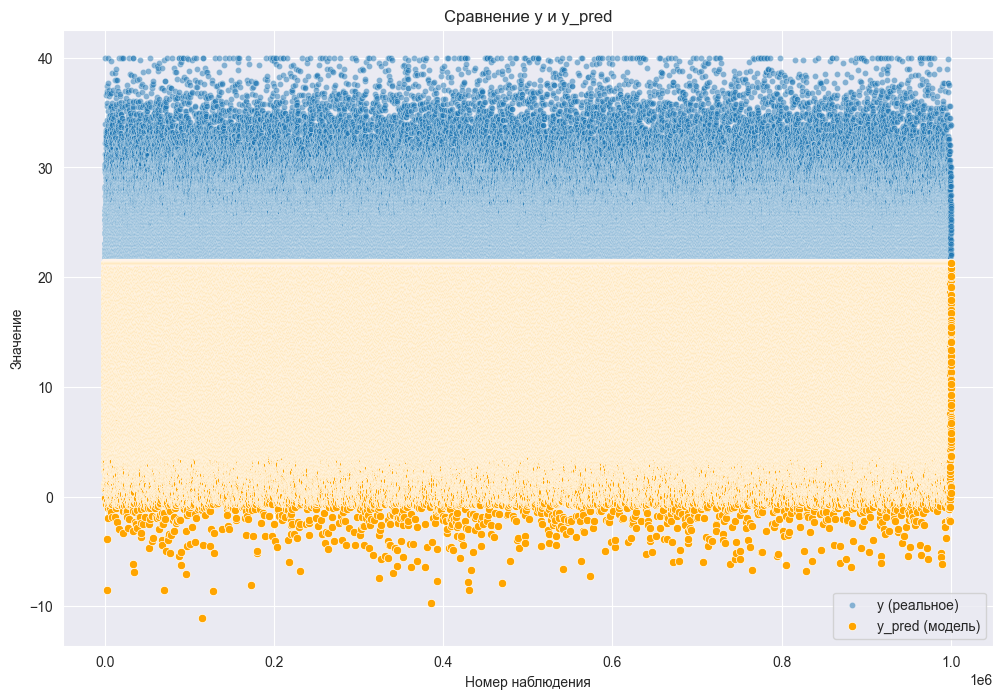

In [48]:
import seaborn as sns
plt.figure(figsize=(12, 8))

# реальные значения точками
sns.scatterplot(x=range(len(y)), y=y, label="y (реальное)", alpha=0.5, s=20)

# предсказания линией
sns.scatterplot(x=range(len(y_pred)), y=y_pred, label="y_pred (модель)", color="orange")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred")
plt.legend()
plt.show()

### Разделение на обучающую, тестовую

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест

### Модель 2 (тестовая и тренировочная)
- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

In [29]:
model2 = LinearRegression() # модель задачи 1
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

In [30]:
for i in all_metrics(y_train, y_pred_train): print(i) # train metrics

MAE: 3.1046297586467424
MSE: 15.593403409908312
RMSE: 3.948848365018377
MAPE: inf
R^2: 0.6724327959233736


In [31]:
for i in all_metrics(y_test, y_pred_test): print(i) # test metrics

MAE: 3.102764557334432
MSE: 15.582952933362842
RMSE: 3.947524912316937
MAPE: inf
R^2: 0.6725980912046057


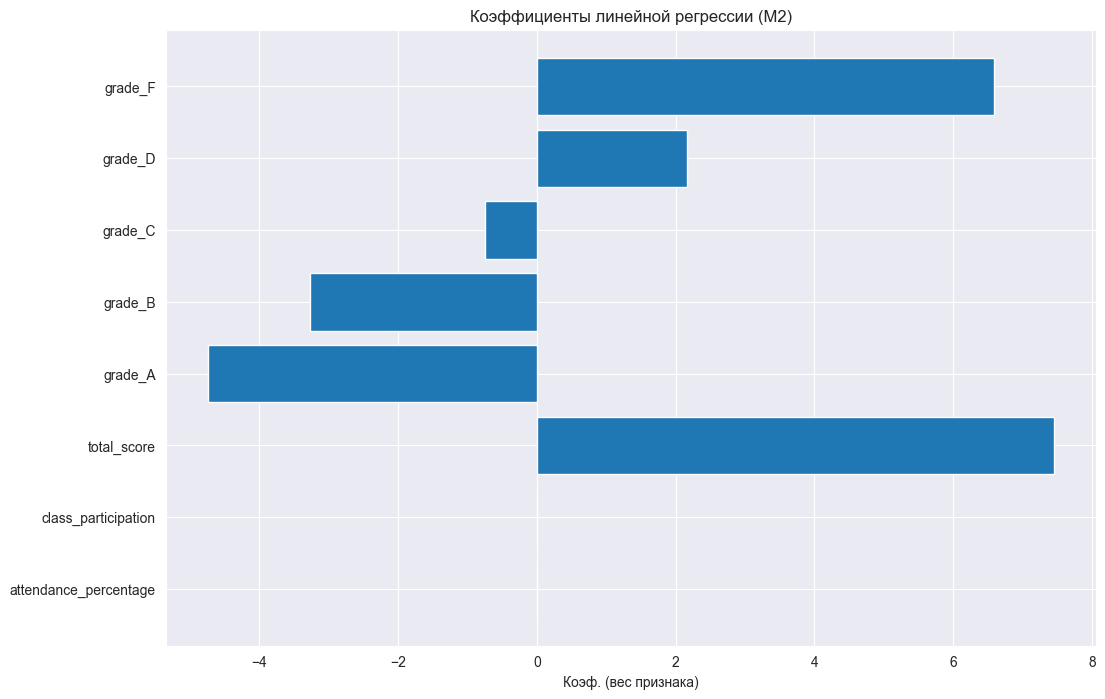

In [32]:
import matplotlib.pyplot as plt

feature_names = X_normal.columns
coefs = model2.coef_

plt.figure(figsize=(12, 8))
plt.barh(feature_names, coefs)
plt.xlabel('Коэф. (вес признака)')
plt.title('Коэффициенты линейной регрессии (M2)')
plt.show()

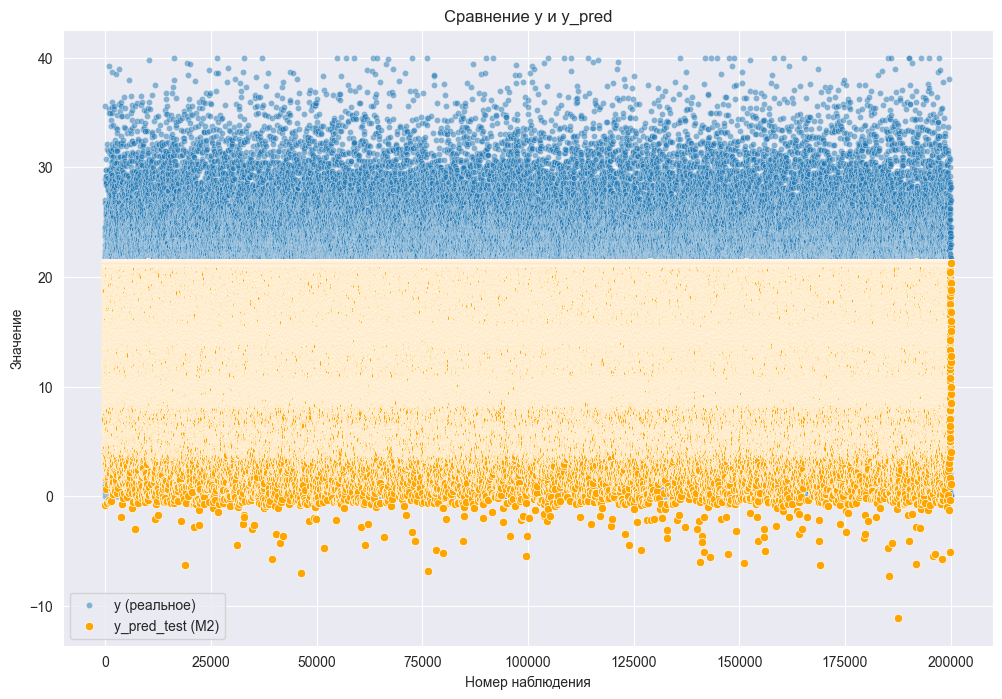

In [33]:
import seaborn as sns
plt.figure(figsize=(12, 8))

# реальные значения точками
sns.scatterplot(x=range(len(y_test)), y=y_test, label="y (реальное)", alpha=0.5, s=20)

# предсказания линией
sns.scatterplot(x=range(len(y_pred_test)), y=y_pred_test, label="y_pred_test (M2)", color="orange")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred")
plt.legend()
plt.show()

### Модель 3
- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

In [34]:
model3 = LinearRegression() # модель задачи 1
model3.fit(X_scaled, y)
y_pred3 = model3.predict(X_scaled)
X_scaled.head(n=3)

,attendance_percentage,class_participation,total_score
0,1.155432,-1.116940,0.882278
1,-0.499891,-1.781419,-0.024872
2,0.168605,-0.350233,1.018350


In [35]:
for i in all_metrics(y_train, y_pred_train): print(i) # оценОчка

MAE: 3.1046297586467424
MSE: 15.593403409908312
RMSE: 3.948848365018377
MAPE: inf
R^2: 0.6724327959233736


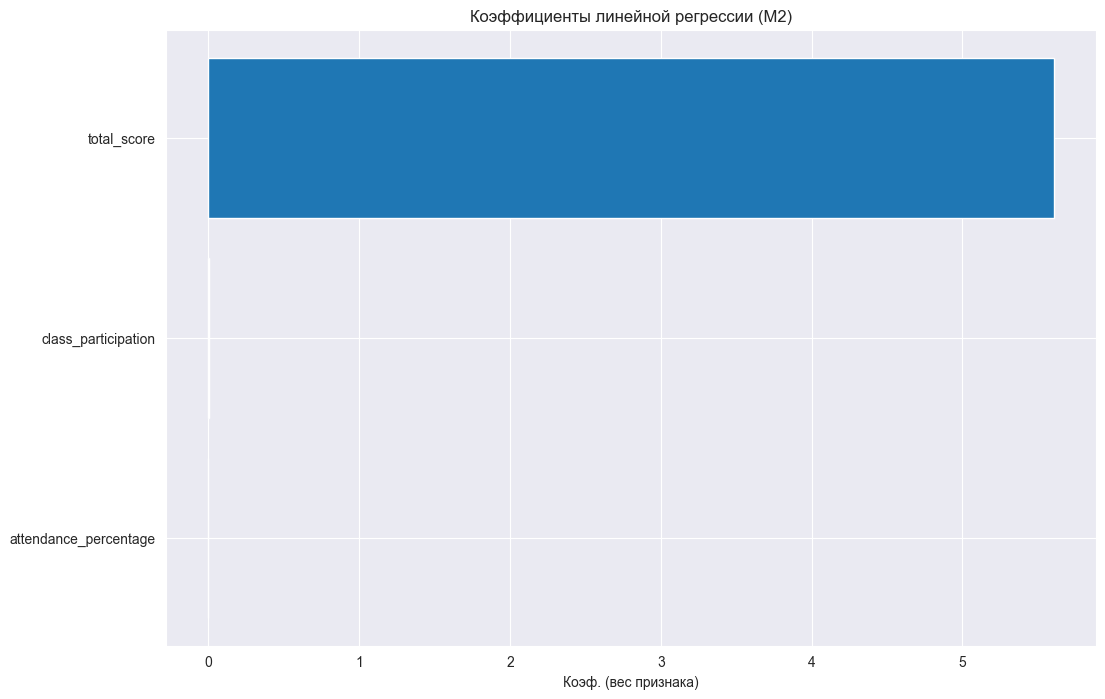

In [36]:
feature_names = X_scaled.columns
coefs = model3.coef_

plt.figure(figsize=(12, 8))
plt.barh(feature_names, coefs)
plt.xlabel('Коэф. (вес признака)')
plt.title('Коэффициенты линейной регрессии (M2)')
plt.show()

C:\python\WEB\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


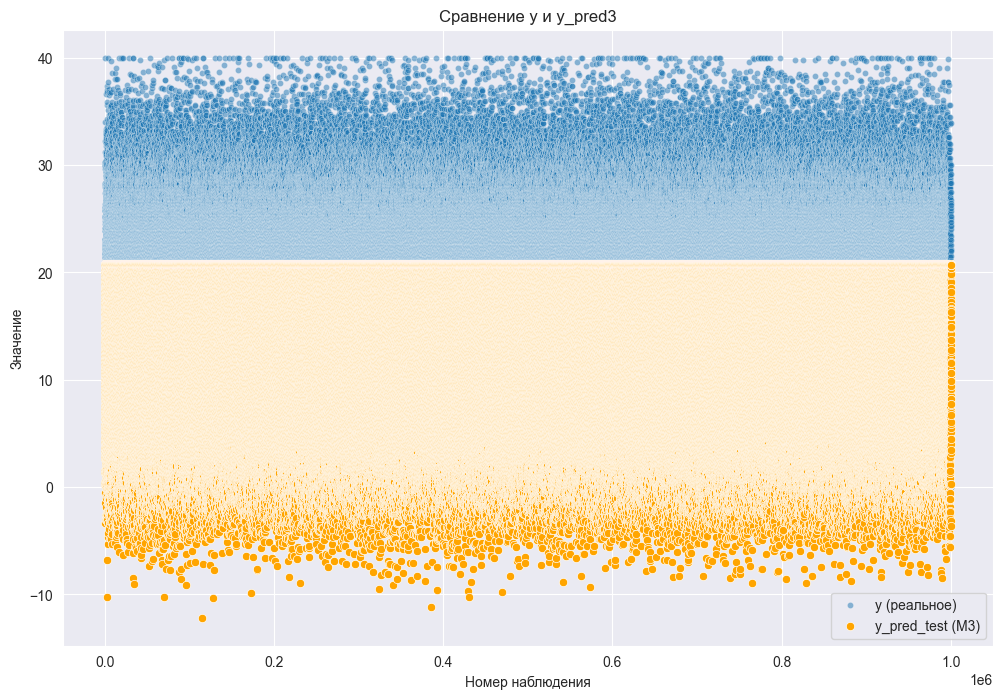

In [47]:
import seaborn as sns
plt.figure(figsize=(12, 8))

# реальные значения точками
sns.scatterplot(x=range(len(y)), y=y, label="y (реальное)", alpha=0.5, s=20)

# предсказания линией
sns.scatterplot(x=range(len(y_pred3)), y=y_pred3, label="y_pred_test (M3)", color="orange")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred3")
plt.legend()
plt.show()

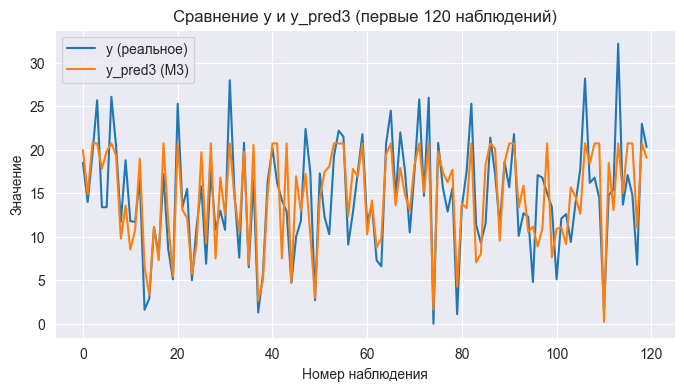

In [38]:
n = 120
y_small = y[:n]
y_pred_small = y_pred3[:n]

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_small)), y=y_small, label="y (реальное)")
sns.lineplot(x=range(len(y_pred_small)), y=y_pred_small, label="y_pred3 (M3)")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title(f"Сравнение y и y_pred3 (первые {n} наблюдений)")
plt.legend()
plt.show()

### Модель 4 (тестовая и тренировочная для М3)
- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

In [39]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест

In [40]:
model4 = LinearRegression()
model4.fit(X_train3, y_train3)
y_pred4_train = model4.predict(X_train3)
y_pred4_test = model4.predict(X_test3)

In [41]:
for i in all_metrics(y_train3, y_pred4_train): print(i) # train metrics

MAE: 3.1561658234686663
MSE: 16.20145432674002
RMSE: 4.025103020636865
MAPE: inf
R^2: 0.6596596037262019


In [42]:
for i in all_metrics(y_test3, y_pred4_test): print(i) # test metrics

MAE: 3.152542389761405
MSE: 16.180538510198033
RMSE: 4.022504009966681
MAPE: inf
R^2: 0.6600426622457238


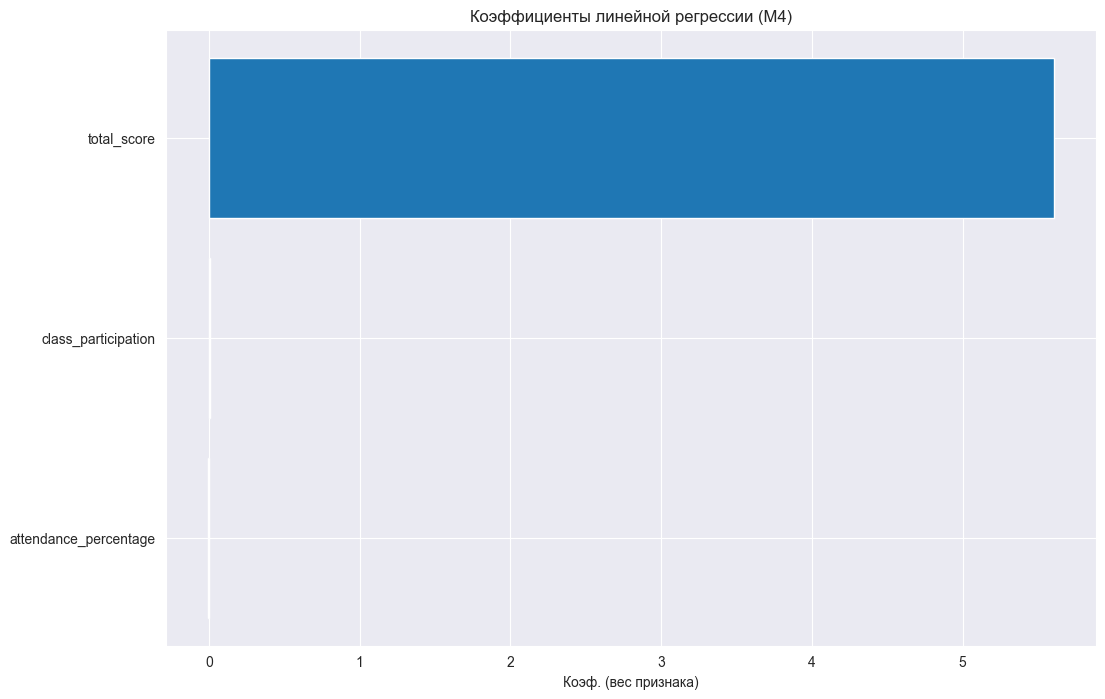

In [43]:
feature_names = X_scaled.columns
coefs = model4.coef_

plt.figure(figsize=(12, 8))
plt.barh(feature_names, coefs)
plt.xlabel('Коэф. (вес признака)')
plt.title('Коэффициенты линейной регрессии (M4)')
plt.show()

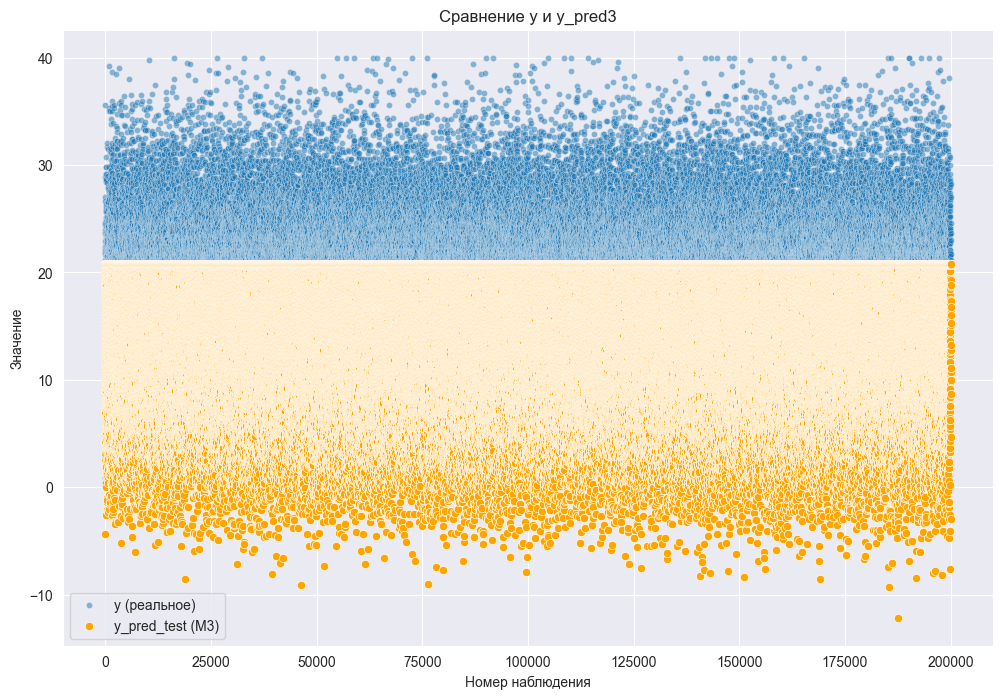

In [44]:
plt.show()
import seaborn as sns

plt.figure(figsize=(12, 8))

# реальные значения точками
sns.scatterplot(x=range(len(y_test3)), y=y_test3, label="y (реальное)", alpha=0.5, s=20)

# предсказания линией
sns.scatterplot(x=range(len(y_pred4_test)), y=y_pred4_test, label="y_pred_test (M3)", color="orange")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred3")
plt.legend()
plt.show()

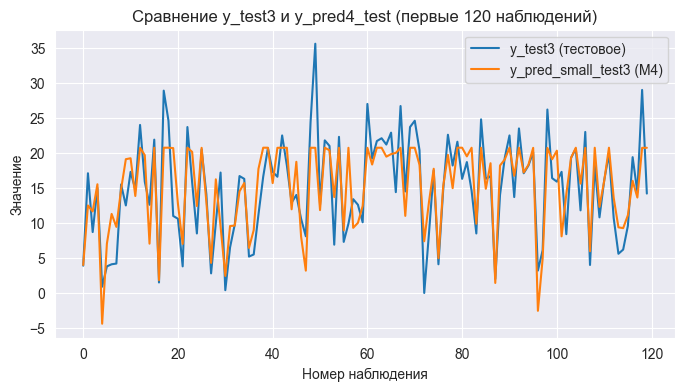

In [46]:
plt.show()
n = 120
y_small_test3 = y_test3[:n]
y_pred_small_test3 = y_pred4_test[:n]

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_small_test3)), y=y_small_test3, label="y_test3 (тестовое)")
sns.lineplot(x=range(len(y_pred_small_test3)), y=y_pred_small_test3, label="y_pred_small_test3 (M4)")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title(f"Сравнение y_test3 и y_pred4_test (первые {n} наблюдений)")
plt.legend()
plt.show()

#### В общем ничего не получилось классного и красивого, грустно, предстоит работа над ошибками, ну и славно)